# Train AutoPilot with GPU support in Colab
> Use Colab to train a neural network for a donkey car



In [ ]:

#connect to gg drive to save your progress
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Get necessary libraries

In [ ]:
#collapse-hide

import tensorflow
from google.colab import drive
from google.colab import files
from IPython.display import Image
import glob
import shutil

# Step 1: Create environment
To train a neural network for the donkeycar we need a few components
- install donkeycar
- upload data via  
    - direct upload
    - mount Google drive



> Note: Donkeycar at the time of writing in March 2020 uses Tensorflow 1.13, therefore version 1.xx is installed

In [ ]:
#collapse-show

print(tensorflow.__version__)

2.17.1


## Git Clone the donkeycar repository

Get the latest donkeycar version from GitHub
> Note: The default branch is "dev", however, the documentation is for the master branch.

In [ ]:
!git clone https://github.com/autorope/donkeycar.git
%cd /content/donkeycar

!git checkout master

Cloning into 'donkeycar'...
remote: Enumerating objects: 16443, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16443 (delta 0), reused 3 (delta 0), pack-reused 16437 (from 1)
Receiving objects: 100% (16443/16443), 90.13 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (10922/10922), done.
/content/donkeycar
Branch 'master' set up to track remote branch 'master' from 'origin'.
Switched to a new branch 'master'


## Install donkey car
Different to the description at http://docs.donkeycar.com/guide/host_pc/setup_ubuntu/ we create no anaconda environment since the script is supposed to run on Colab which will delete the instance anyway once you disconnect the notebook.

In [ ]:
!pip3 install -e .[pc]

Obtaining file:///content/donkeycar
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7aff3768fa073431d780ef50459cacc831b6fe19d5f97ad2b9a6b9e78be5efa2
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9613 sha256=1ff5a4fb2374d55ee89a0002a1310c214f870a4321269d88666ee30d21330a7f
  Stored in directory: /root/.cache/pip/wheels/a2/68/5f/c339b20a41659d856c93ccdce6a33095493eb82c3964aac5a1
Successfully built docopt progress
  Running setup.py develop for donkeycar


## Create Project
In this step the following actions take place
- create necessary folders (models, data, logs)
- copying necessary files into folders (manage.py, myconfig.py etc.)


In [ ]:
!donkey createcar --path /content/mycar

________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v4.2.1 ...
/content/donkeycar/donkeycar/management/joystick_creator.py:146: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(dev_fn) is 0:
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying calibrate script. Adjust these before st

# Step 2: Supply Data
In order to train the neural network we need to supply trainings data which are recorded on the jetson during driving the car on the track



## Step 2 opt A: Supply own data




### Zip data on jetson
Copy the following code and run on raspi
> Note: Copying of the data is much faster if the data is zipped to one file.

```bash
cd ~/mycar/data
# either compress just one folder
tar -czf tub_xx_yyyy_mm_dd.tar.gz tub_xx_yyyy_mm_dd
# or all folders starting with "tub"
tar -czf trainingsData2020_03-01.tar.gz tub*


```

This will create a tub_xx_yyyy_mm_dd.tar.gz file under ~/mycar/data

### Copy the zipped tub to your local PC

Run this on your local pc
```
sftp fptlab@IP_address
cd ~/mycar/data
get tub_xx_yyyy_mm_dd.tar.gz
```



Define your tub name here

In [ ]:
tub_name="data"

### Upload the tub from Google Drive

First upload the tub_x_yyyy_mm_dd.tar.gz to Google Drive. We will then mount Google Drive from colab and copy the data from Drive directly.
> Note: To copy data from Google Drive to Colab is faster than uploading it from local machine.  

When you run the cell below, you will need to click the link and generate an authorization code to for colab to access your drive.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Suppose you upload the tub_xx_yyyy_mm_dd.tar.gz to Google Drive/mycar/tub_xx_yyyy_mm_dd.tar.gz, this is how you copy it from Google Drive to colab

In [ ]:
%cd /content/mycar
!rm -rf data
!unrar x /content/drive/MyDrive/data.rar /content/mycar

Streaming output truncated to the last 5000 lines.
Extracting  /content/mycar/data/images/14905_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14906_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14907_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14908_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14909_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14910_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14911_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14912_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14913_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/data/images/14914_cam_image_array_.jpg         23%  OK 
Extracting  /content/mycar/da

In [ ]:
%cd /content/mycar
!rm -rf data
!mkdir data
%cd /content/mycar/data
!cp /content/drive/MyDrive/prepare_for_train_donkeyCar/{tub_name}.tar.gz /content/mycar/data

/content/mycar
/content/mycar/data


And untar it to the right place

In [ ]:
%cd /content/mycar/data
!tar -xzf {tub_name}.tar.gz

/content/mycar/data


Lets look at one image to see we got valid data

Check number of record( should be >= 20000)

In [ ]:
%cd /content/mycar/{tub_name}
!find . -type f -name "*.jpg" | wc -l

/content/mycar/data
9165


/content/mycar/data/images


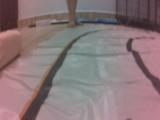

In [ ]:
%cd /content/mycar/data/images/
file = glob.glob("*.jpg")
Image(file[100])

Next step is to train your model in section [Upload local files](#uplaod_local_files) (Link only works in blog not in Colab)

# Step 3: Upload myconfig.py
<a id='uplaod_local_files'></a>
You can upload files from local machine as well, but probably is slower than above approach downloading files from Google Drive

In [ ]:
# uploaded = files.upload()

/content/mycar


In [ ]:
%cd /content/mycar
!cp /content/drive/MyDrive/prepare_for_train_donkeyCar/myconfig.py /content/mycar

/content/mycar


# Step 4: Train your model
<a id='train_model'></a>
There are several types of modes available:

 - linear
 - categorical
 - rnn
 - imu
 - behavior
 - 3d
 - localizer  
 And you can use pre-trained models by adding a flag
- `[--transfer=<model>]`

## Step 4 opt A: Transfer learning using pre-trained model
> Note: You can use a pre-trained model and use transfer learning

Do not forget to set the variables in myconfig.py  


```
FREEZE_LAYERS = True  
`#default False will allow all layers to be modified by training

NUM_LAST_LAYERS_TO_TRAIN = 7  
`#when freezing layers, how many layers from the last should be allowed to train?
```





#### Upload pre-trained model
Upload model in case you want to use a pre-trained model for transfer learning.
To define which layers shall be trained and which shall be frozen set the parameters in `myconfig.py``

Model transfer options

When copying weights during a model transfer operation, should we freeze a certain number of layers to the incoming weights and not allow them to change during training?

```
FREEZE_LAYERS = False               #default False will allow all layers to be modified by training
NUM_LAST_LAYERS_TO_TRAIN = 7        #when freezing layers, how many layers from the last should be allowed to train?

 ```



In [ ]:
%cd /content/mycar/models
!cp /content/drive/My\ Drive/myCar/base_linear.h5 .

/content/mycar/models
cp: cannot stat '/content/drive/My Drive/myCar/base_linear.h5': No such file or directory


Plot the model structure

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
%cd /content/mycar/models
model = load_model('base_linear.h5')
plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

/content/mycar/models


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'base_linear.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

##### Start transfer learning of pre-trained model
Use the `manage.py` script to start training

In [ ]:
!python /content/mycar/manage.py train  --type=linear --transfer=/content/mycar/models/base_linear.h5  --model=/content/mycar/models/mypilot.h5


________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v5.0.0 ...
Usage:
    manage.py (drive) [--model=<model>] [--js] [--type=(linear|categorical)] [--camera=(single|stereo)] [--meta=<key:value> ...] [--myconfig=<filename>]
    manage.py (train) [--tubs=tubs] (--model=<model>) [--type=(linear|inferred|tensorrt_linear|tflite_linear)]


## Step 4 opt B: Train model  
Use the `manage.py` script to start training

In [ ]:
"""
Usage:
    train.py [--tubs=tubs] (--model=<model>)
    [--type=(linear|inferred|tensorrt_linear|tflite_linear)]
    [--comment=<comment>]
"""
%cd /content/mycar

model_name = "mypilot.h5"
!donkey train --tub ./data/tub* --type linear --model models/{model_name}

/content/mycar
________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v4.2.1 ...
loading config file: ./config.py
loading personal config over-rides from myconfig.py
2024-11-18 15:56:19.917089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 15:56:19.951167: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 15:56:19.961669: E exte